K-Means Clustering Demo

Problem Statement 1: Consider Walmart wnats to open multiple stores in Florida. By KMeans we will find the ideal locations to open stores in Florida based on the data of their costumers they already have.

Note: It is jusst a problem statement, we will generate blobs randomly, which means it will b e rnadom dataset, considering the fact that K = 4

In [25]:
#@title import libraries
import numpy as np

from sklearn import svm
from sklearn.datasets import make_blobs
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

%matplotlib inline

In [26]:
#@title Creating 300 seperable points

X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std=0.60, random_state = 0)

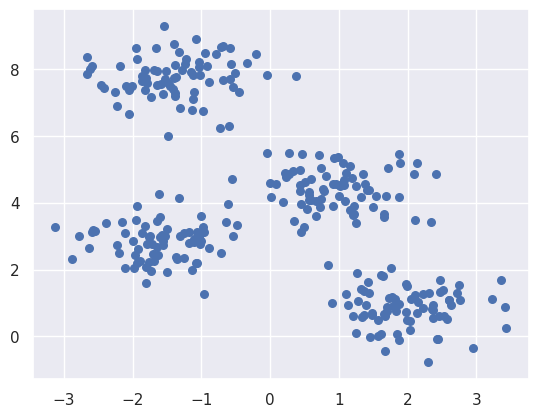

In [27]:
#@title Visualize the data in graph form

plt.scatter(X[:, 0], X[:, 1], s=30)

In [28]:
#@title Model Implementation

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [29]:
y_kmeans

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 0, 3, 0, 0,
       3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 3, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2,
       1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 2, 0, 3, 1, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 1, 3, 2, 3, 1, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1,
       2, 3, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 3, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3], d

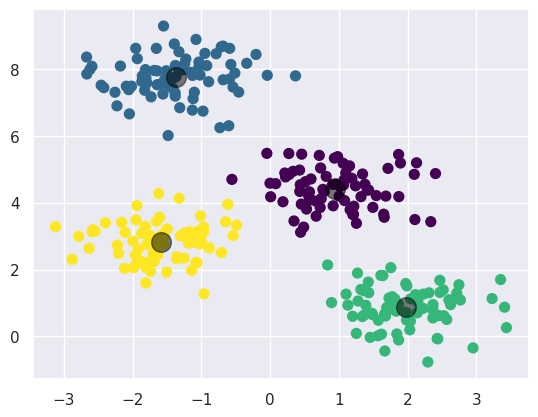

In [30]:
#@title Finding Clusters

def find_clusters(X, n_clusters, rseed=2, tol=1e-4, max_iter=300):
  # 1. Randomly choose clusters
  rng = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]
  iteration = 0

  while iteration < max_iter:
    # 2a. Assign labels based on closest centers
    labels = pairwise_distances_argmin(X, centers)

    # 2b. Find new centers from means of points
    new_centers = np.array([X[labels == i].mean(0)
                              for i in range(n_clusters)])

    # 2c. Check for convergence
    if np.linalg.norm(new_centers - centers) < tol:
      '''
        `np.linalg.norm(new_centers - centers)`: This calculates the Euclidean norm of the difference between new_centers and centers.
        `np.linalg.norm(new_centers - centers) < tol`:
          Checks if the calculated Euclidean norm is less than the specified tolerance level tol.

        If the change in centers is below this tolerance level, it means that the difference between the old and
        new centers is small enough to be considered negligible, and convergence is achieved.
      '''
      break

    centers = new_centers
    iteration += 1

  return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Considering use of K-Means Clustering in Real Life Examples.

Color Compression on Images using KMeans

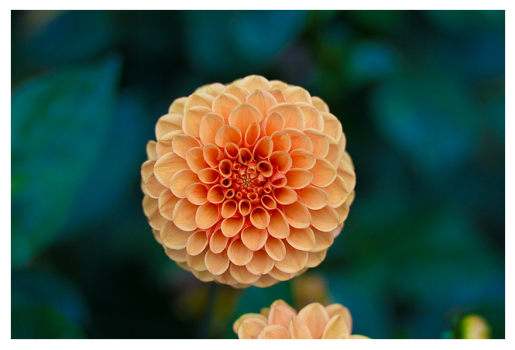

In [31]:
#@title Loading and Viewing Data

from sklearn.datasets import load_sample_image

image = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image)

In [32]:
#@title Viewing Dimensions of the array
image.shape

(427, 640, 3)

In [33]:
#@title Reshaping the data

#[n_samples x n_features]
data = image / 255.0
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

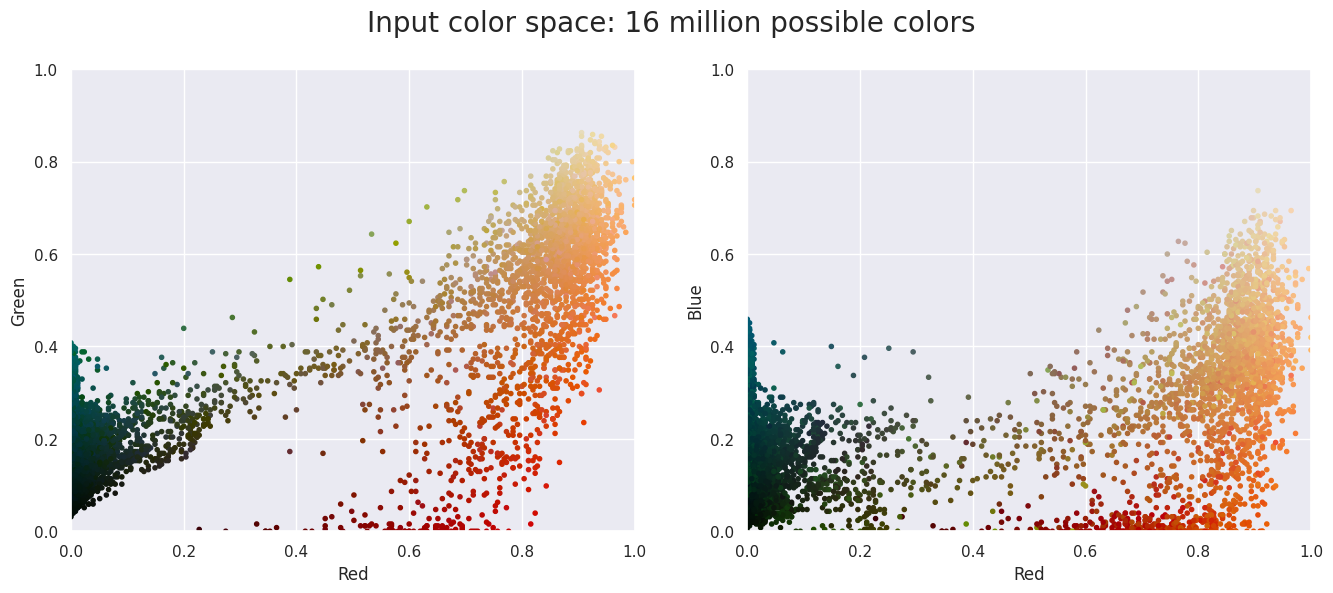

In [34]:
#@title Visualize these pixels in this color space

def plot_pixels(data, title, colors=None, N=10000):
  if colors is None:
    colors = data

    #choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

plot_pixels(data, title="Input color space: 16 million possible colors")


In [35]:
#@title Model Implementation

import warnings; warnings.simplefilter('ignore') #Fix for numpy issues

from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title='Reduced color space: 16 colors')

Text(0.5, 1.0, '16-color Image')

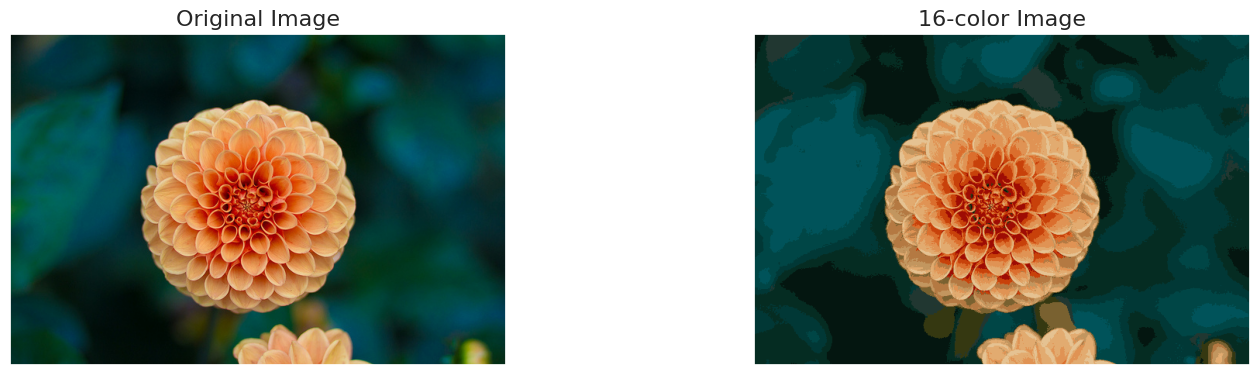

In [36]:
#@title Viewing Compressed image

image_recolored = new_colors.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.5)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)

ax[1].imshow(image_recolored)
ax[1].set_title('16-color Image', size=16)

color compression on another image

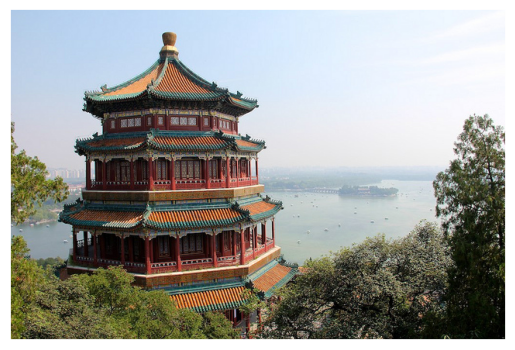

In [37]:
#@title Loading and Viewing Data

from sklearn.datasets import load_sample_image

image = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image)

In [38]:
#@title Viewing Dimensions of the array
image.shape

(427, 640, 3)

In [39]:
#@title Reshaping the data

#[n_samples x n_features]
data = image / 255.0
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

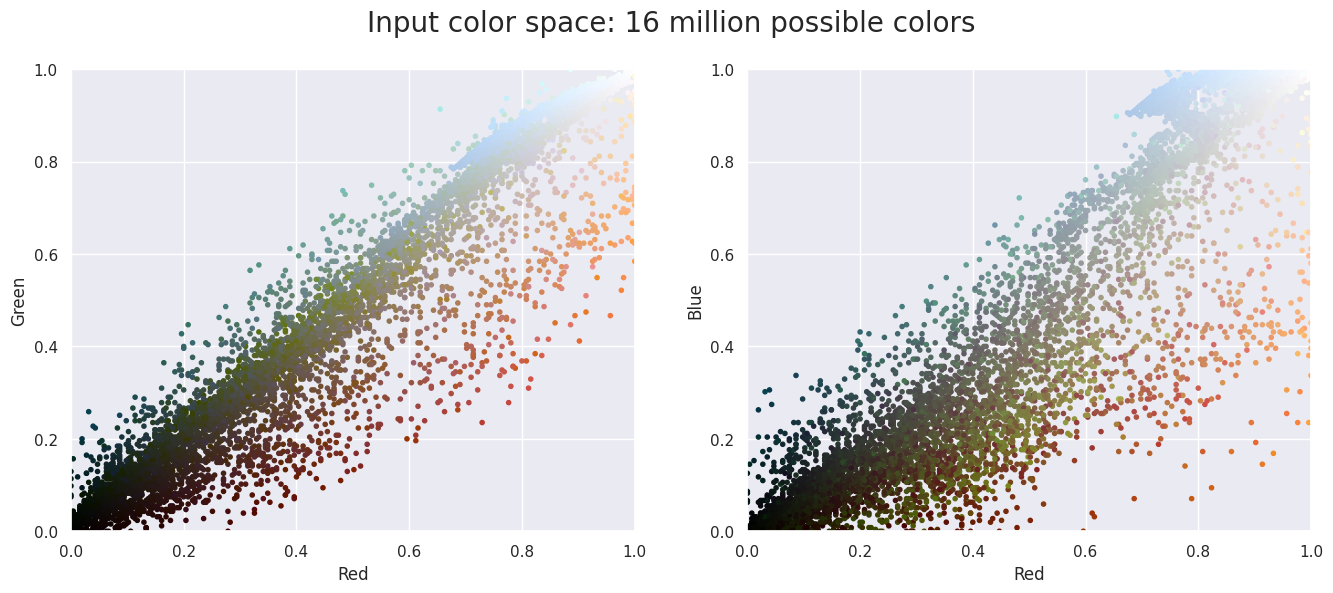

In [40]:
#@title Visualize these pixels in this color space

def plot_pixels(data, title, colors=None, N=10000):
  if colors is None:
    colors = data

    #choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

plot_pixels(data, title="Input color space: 16 million possible colors")


In [41]:
#@title Model Implementation

import warnings; warnings.simplefilter('ignore') #Fix for numpy issues

from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title='Reduced color space: 16 colors')

Text(0.5, 1.0, '16-color Image')

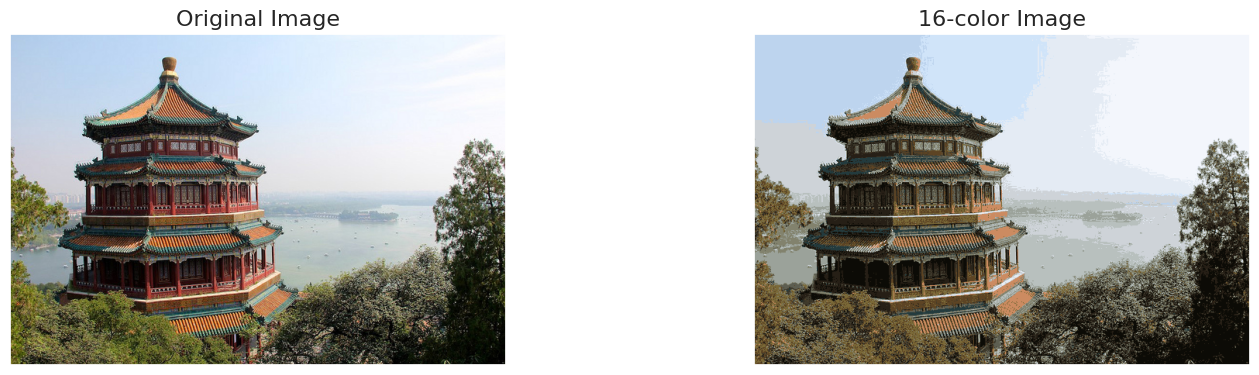

In [42]:
#@title Viewing Compressed image

image_recolored = new_colors.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.5)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)

ax[1].imshow(image_recolored)
ax[1].set_title('16-color Image', size=16)